# Project 2 - IMDB score classification with recurrent neural networks (simple RNN and LSTM)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import keras
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

Using TensorFlow backend.


`SimpleRNN` processes batches of sequences. This means that it takes inputs of shape `(batch_size, timesteps, input_features)`, rather than `(timesteps,  input_features)`.

Like all recurrent layers in Keras, `SimpleRNN` can be run in two different modes: it can return either the full sequences of successive outputs for each timestep (a 3D tensor of shape `(batch_size, timesteps, output_features)`), or it can return only the last output for each input sequence (a 2D tensor of shape `(batch_size, output_features)`). These two modes are controlled by the `return_sequences` constructor 

In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


It is sometimes useful to stack several recurrent layers one after the other in order to increase the representational power of a network. 
In such a setup, you have to get all intermediate layers to return full sequences:

In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


Now let's try to use such a model on the IMDB movie review classification problem. First, preprocessing:

In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words this reduces the computing time significantly, but also limits accuracy

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


Training a simple recurrent network using an `Embedding` layer and a `SimpleRNN` layer:

In [6]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 14s 724us/step - loss: 0.6066 - acc: 0.6578 - val_loss: 0.9197 - val_acc: 0.5698
Epoch 2/10
20000/20000 [==============================] - 16s 784us/step - loss: 0.3744 - acc: 0.8440 - val_loss: 0.3573 - val_acc: 0.8500
Epoch 3/10
20000/20000 [==============================] - 16s 817us/step - loss: 0.2709 - acc: 0.8938 - val_loss: 0.4175 - val_acc: 0.8184
Epoch 4/10
20000/20000 [==============================] - 17s 830us/step - loss: 0.2130 - acc: 0.9180 - val_loss: 0.3547 - val_acc: 0.8678
Epoch 5/10
20000/20000 [==============================] - 17s 835us/step - loss: 0.2124 - acc: 0.9205 - val_loss: 0.3772 - val_acc: 0.8426
Epoch 6/10
20000/20000 [==============================] - 17s 848us/step - loss: 0.1374 - acc: 0.9521 - val_loss: 0.5016 - val_acc: 0.7806
Epoch 7/10
20000/20000 [==============================] - 16s 823us/s

Visualizing the training and validation loss and accuracy over the epochs:

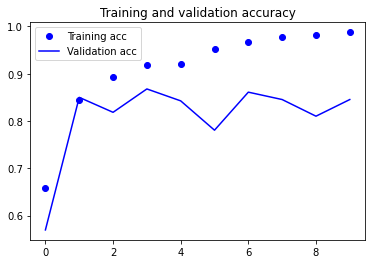

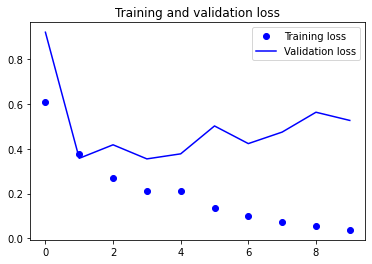

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

An accuracy of approximately 85% is on this dataset and problem not very high. This is mainly due to two things: 1) the limit of included word = 500 resultes in faster computational times for the sake of the experiement, but it does also reduce the magnitude of the signal parsed through the network. 2) The remainder of the problem is simply that `SimpleRNN` isn't very good at processing long sequences, like text. Other types of recurrent layers perform much better.

## A LSTM implementation

Note: The parameters of the keras LSTM layers are kept to the default initially

In [8]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.5159 - acc: 0.7533 - val_loss: 0.4084 - val_acc: 0.8256
Epoch 2/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.3009 - acc: 0.8830 - val_loss: 0.6455 - val_acc: 0.7644
Epoch 3/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.2433 - acc: 0.9095 - val_loss: 0.2800 - val_acc: 0.8866
Epoch 4/10
20000/20000 [==============================] - 47s 2ms/step - loss: 0.2038 - acc: 0.9251 - val_loss: 0.3423 - val_acc: 0.8830
Epoch 5/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.1796 - acc: 0.9362 - val_loss: 0.2950 - val_acc: 0.8810
Epoch 6/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.1587 - acc: 0.9434 - val_loss: 0.4362 - val_acc: 0.8468
Epoch 7/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.1437 - acc: 0.9501 - val_loss: 0.3320 - val_acc:

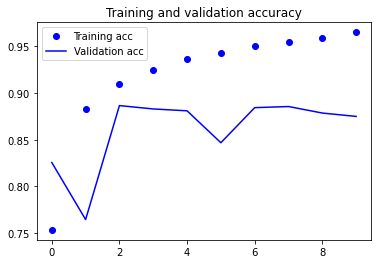

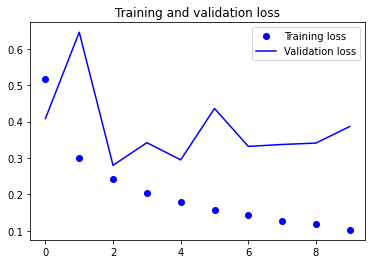

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Final remarks
This simple implementation did achieve a significantly higher accuracy with just the base hyper parameters settings.
In order to potentially achieve higher accuracy, one should play around with different hyperparameters.

**Hyperparameters for tuning:**
- Number of neurons
- Number of layers
- Number of epochs
- Batch size
- Learning rate
- Dropout: rate of dropout
- RNN's further has its own hyperparameters